# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.295834e+01     1.744232e+01
 * time: 0.00462794303894043
     1     6.161522e+01     8.846141e+00
 * time: 0.014333009719848633
     2     5.672578e+01     1.127868e+01
 * time: 0.03730487823486328
     3     4.130682e+01     8.521660e+00
 * time: 0.06653189659118652
     4     3.262785e+01     7.713945e+00
 * time: 0.09739089012145996
     5     3.261401e+01     7.803262e+00
 * time: 0.12245297431945801
     6     1.851957e+01     4.983737e+00
 * time: 0.14785504341125488
     7     1.652053e+01     4.964495e+00
 * time: 0.30998897552490234
     8     1.451229e+01     7.408084e+00
 * time: 0.3268909454345703
     9     1.271669e+01     7.774700e+00
 * time: 0.3480660915374756
    10     9.860840e+00     6.449855e+00
 * time: 0.3692820072174072
    11     7.080329e+00     2.387943e+00
 * time: 0.39075398445129395
    12     6.017858e+00     1.519119e+00
 * time: 0.41225290298461914
    13     5.824392e+00     1.258303e+00
 * time: 0

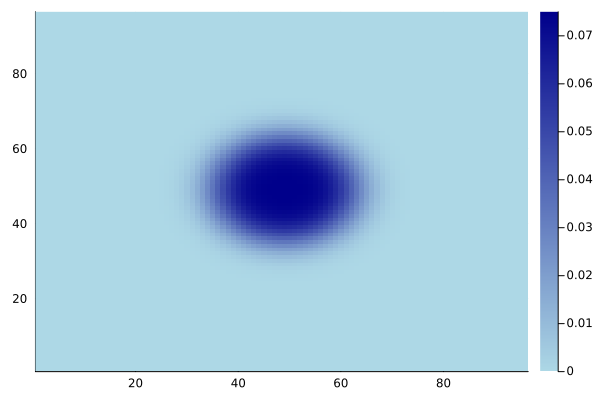

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)